# CIÊNCIA DE DADOS - DCA3501

UNIVERSIDADE FEDERAL DO RIO GRANDE DO NORTE, NATAL/RN

DEPARTAMENTO DE ENGENHARIA DE COMPUTAÇÃO E AUTOMAÇÃO

## A. Identificação

- Título da técnica: Gaussian Mixture Models (GMM)
- Discentes:

  *   Iago Rafael Ramos Cantuaria Moreira
  *   Pedro Henrique da Silva Santos

- Docente:
  * Carlos Manuel Dias Viegas

## B. Introdução e motivação
#GMM - Gaussian Mixture Models.

Um modelo diferente do padrão. Enquanto outros modelos classificam os dados de forma rígida e mecânica. GMM apresenta a matriz de covariância. Isso permite que o modelo se adapte a estruturas dos dados, capturando correlações entre as dimensões. Ou seja, o GMM não força os dados a se ajustarem, ele força si mesmo a se ajustar aos dados.

O modelo de mistura de Gaussianas é usado para o agrupamento de dados estimando a probabilidade de uma instância ` Xᵢ` pertencer à algum cluster, onde cada cluster é representado por uma distribuição Gaussiana. A imagem abaixo é uma visualização da representação de um conjunto de dados de baixa dimensão sendo sobrepostos por curvas Gaussianas que aproximam a distribuição desses dados.
Com aplicações que podem varias de simples (como um detector de transações "normais" ou "anormais" em um banco) à Complexas (como o estudo de Frequências e Ruídos em diferentes tipos de Antenas)
<br>

<div align="center">

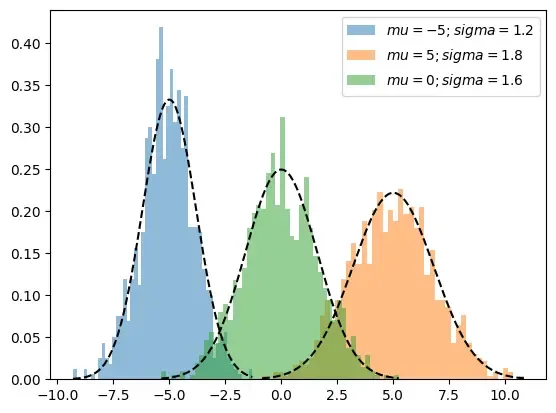


<a href="https://media.geeksforgeeks.org/wp-content/uploads/20250905101108541893/GMM.webp"> GeeksForGeeks - Gaussian Mixture Model </a>
</div>


## C. Fundamentos teóricos básicos

# 1. A Forma
As formas geométricas dos clusters da GMM são formatos mais próximos de elipses e elipsoides rotacionados, diferente dos círculos e esferas perfeitas do K-Means. Essa diferença fundamental está na forma que a Matriz de Covariância está definida.

No GMM, a Matriz de Covariância tem mais autonomia na adoção de seus valores internos, enquanto a mesma matriz para o K-Means tem a forma de uma matriz de identidade.

Devido a essas diferenças no formato de valores na Matriz, os clusters da GMM podem ser distorcidos para a forma de elipses e com o potencial de serem rotacionadas, enquanto o K-Means é incapaz de fugir de sua forma esférica/circular.

#2. A Probabilidade
Através da sobreposição dessas Distribuições Gaussianas, o modelo consegue além de classificar os dados, também nos permite atestar um grau de confiança em uma decisão com base nos valores probabilísticos gerados.

Esse formato é chamado de 'Soft Clustering'. Uma abordagem superior ao lidarmos com sobreposição de fronteiras de clusters, algo comum ao lidarmos com quantidades maiores de dados.

#3. O Aprendizado
O GMM considera que um conjunto de dados pode ser representado por K distribuições Gaussianas de parâmetros desconhecidos. Há diversos métodos de incialização os quais inicializam as Gaussianas e aplicam o algorítimo [Expectation-Maximization](https://en.wikipedia.org/wiki/Expectation%E2%80%93maximization_algorithm) que estima e otimiza a média e covariança de cada uma.

O algoritimo EM faz a otimização estimando parâmetros iniciais para a Gaussiana, calculando a probabilidade inicial de cada ponto/instância pertencer à cada cluster e o log da possibilidade (likelihood) dessa instância pertencer à cada cluster. Repetindo esse processo o algoritimo modela as Gaussianas às instâncias que otimizam a função `log-likelihood`   

A otimização da função `log-likelihood` ocorre ao atualizar os parâmetros das Gaussianas:
[https://www.ibm.com/think/topics/gaussian-mixture-model]


<br> Média:   $ 𝜇ₖ = \frac{ ∑ ₙ  y(zᵢ)⋅xᵢ}{∑ ₙ  y(zᵢ)} $


<br> Covariância: $ ∑ ₖ = \frac{ ∑ y(zᵢ) ⋅ (xᵢ- 𝜇ₖ) ⋅ (xᵢ - 𝜇ₖ)^T }{ ∑ᵢy(zᵢ) } $


<br> Peso de mistura ( Mixture weight ): $ Wₖ = \frac{1}{n} ⋅ ∑ᵢ y(z ᵢ)  $


<br> O mixture weight é um peso que representa a probabilidade de uma instância qualquer estar presente em um cluster. Ao fim do algoritimo EM cada cluster terá além de uma média e variança, um peso atribuído a ele, o qual representa a probabilidade de uma instância qualquer estar dentro dos conjuntos de dados representados por aquela Gaussiana. [https://stats.stackexchange.com/a/476352]

## D. Descrição do dataset

UNSW-NB15 é um dos datasets mais populares e importantes para a pesquisa moderna em detecção de intrusão de rede. Ele foi criado pelo laboratório de pesquisa da University of New South Wales (UNSW), em Canberra, Austrália, em 2015.

Ele foi desenvolvido para substituir datasets antigos (como o KDD'99 e o NSL-KDD), que já não refletiam a complexidade do tráfego de redes modernas nem as novas táticas de ataque.

O conjunto de treino tem 175341 linhas e 44 colunas.
O conjunto de teste tem 82332 linhas e 44 colunas.

O conjunto completo possui variáveis categóricas não numéricas, escalas entre variáveis diferentes e valores nulos, não existente ou inválidos ( caracteres ).

O link para acesso está nas referências.



In [ ]:
# Exemplo de carregamento e visualização inicial do dataset
import pandas as pd

# Exemplo (substitua pelo seu dataset)
df_test_set = pd.read_csv('/content/UNSW_NB15_testing-set.csv')
df_training_set = pd.read_csv('/content/UNSW_NB15_training-set.csv')
df_training_set.head()

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.121478,tcp,-,FIN,6,4,258,172,74.087490,...,1,1,0,0,0,1,1,0,Normal,0
1,2,0.649902,tcp,-,FIN,14,38,734,42014,78.473372,...,1,2,0,0,0,1,6,0,Normal,0
2,3,1.623129,tcp,-,FIN,8,16,364,13186,14.170161,...,1,3,0,0,0,2,6,0,Normal,0
3,4,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,...,1,3,1,1,0,2,1,0,Normal,0
4,5,0.449454,tcp,-,FIN,10,6,534,268,33.373826,...,1,40,0,0,0,2,39,0,Normal,0


In [ ]:
df_training_set = df_training_set.drop(['id'], axis=1)
df_test_set = df_test_set.drop(['id'], axis=1)

print(df_training_set.shape)
print(df_test_set.shape)

(175341, 44)
(82332, 44)


In [ ]:
df_training_set.info()
df_test_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175341 entries, 0 to 175340
Data columns (total 44 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   dur                175341 non-null  float64
 1   proto              175341 non-null  object 
 2   service            175341 non-null  object 
 3   state              175341 non-null  object 
 4   spkts              175341 non-null  int64  
 5   dpkts              175341 non-null  int64  
 6   sbytes             175341 non-null  int64  
 7   dbytes             175341 non-null  int64  
 8   rate               175341 non-null  float64
 9   sttl               175341 non-null  int64  
 10  dttl               175341 non-null  int64  
 11  sload              175341 non-null  float64
 12  dload              175341 non-null  float64
 13  sloss              175341 non-null  int64  
 14  dloss              175341 non-null  int64  
 15  sinpkt             175341 non-null  float64
 16  di

In [ ]:
df_training_set.describe()

,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,...,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,label
count,175341.000000,175341.000000,175341.000000,1.753410e+05,1.753410e+05,1.753410e+05,175341.000000,175341.000000,1.753410e+05,1.753410e+05,...,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000
mean,1.359389,20.298664,18.969591,8.844844e+03,1.492892e+04,9.540619e+04,179.546997,79.609567,7.345403e+07,6.712056e+05,...,5.383538,4.206255,8.729881,0.014948,0.014948,0.133066,6.955789,9.100758,0.015752,0.680622
std,6.480249,136.887597,110.258271,1.747656e+05,1.436542e+05,1.654010e+05,102.940011,110.506863,1.883574e+08,2.421312e+06,...,8.047104,5.783585,10.956186,0.126048,0.126048,0.701208,8.321493,10.756952,0.124516,0.466237
min,0.000000,1.000000,0.000000,2.800000e+01,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,0.000008,2.000000,0.000000,1.140000e+02,0.000000e+00,3.278614e+01,62.000000,0.000000,1.305334e+04,0.000000e+00,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,2.000000,2.000000,0.000000,0.000000
50%,0.001582,2.000000,2.000000,4.300000e+02,1.640000e+02,3.225807e+03,254.000000,29.000000,8.796748e+05,1.447023e+03,...,1.000000,1.000000,3.000000,0.000000,0.000000,0.000000,3.000000,4.000000,0.000000,1.000000
75%,0.668069,12.000000,10.000000,1.418000e+03,1.102000e+03,1.250000e+05,254.000000,252.000000,8.888889e+07,2.784487e+04,...,5.000000,3.000000,12.000000,0.000000,0.000000,0.000000,9.000000,12.000000,0.000000,1.000000
max,59.999989,9616.000000,10974.000000,1.296523e+07,1.465555e+07,1.000000e+06,255.000000,254.000000,5.988000e+09,2.242273e+07,...,51.000000,46.000000,65.000000,4.000000,4.000000,30.000000,60.000000,62.000000,1.000000,1.000000


## E. Preparação dos dados

#### Bibliotecas e Imports

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

### Pré-processamento do dataset de treinamento e teste

#### Limpeza e modelagem dos dados

In [ ]:
#### SUBSTITUINDO TIPO DE PROTOCOLOS POR VALORES INTEIROS ####

import numpy as np


print(len(df_test_set['proto'].unique()))
print(df_test_set['proto'].isna().sum())

print(len(df_training_set['proto'].unique()))
print(df_training_set['proto'].isna().sum())

#### REMOVENDO VALORES NAN DA COLUNA DE PROTOCOLOS DO CONJUNTO DE TESTE
df_test_set['proto'] = [df_test_set['proto'][i] for i in range(len(df_test_set['proto'])) if df_test_set['proto'][i] != 'nan' ]

protocolos_treino = df_training_set['proto'].unique()
protocolos_teste = df_test_set['proto'].unique()

map = {protocolo: i for i, protocolo in enumerate(protocolos_treino)}

#print(map)

print(df_training_set['proto'].unique())
df_training_set['proto'] = df_training_set['proto'].map(map)
print(df_training_set['proto'].unique())

print(df_test_set['proto'].unique())
df_test_set['proto'] = df_test_set['proto'].map(map)
print(df_test_set['proto'].unique())

131
0
133
0
['tcp' 'udp' 'arp' 'ospf' 'icmp' 'igmp' 'rtp' 'ddp' 'ipv6-frag' 'cftp'
 'wsn' 'pvp' 'wb-expak' 'mtp' 'pri-enc' 'sat-mon' 'cphb' 'sun-nd' 'iso-ip'
 'xtp' 'il' 'unas' 'mfe-nsp' '3pc' 'ipv6-route' 'idrp' 'bna' 'swipe'
 'kryptolan' 'cpnx' 'rsvp' 'wb-mon' 'vmtp' 'ib' 'dgp' 'eigrp' 'ax.25'
 'gmtp' 'pnni' 'sep' 'pgm' 'idpr-cmtp' 'zero' 'rvd' 'mobile' 'narp' 'fc'
 'pipe' 'ipcomp' 'ipv6-no' 'sat-expak' 'ipv6-opts' 'snp' 'ipcv'
 'br-sat-mon' 'ttp' 'tcf' 'nsfnet-igp' 'sprite-rpc' 'aes-sp3-d' 'sccopmce'
 'sctp' 'qnx' 'scps' 'etherip' 'aris' 'pim' 'compaq-peer' 'vrrp' 'iatp'
 'stp' 'l2tp' 'srp' 'sm' 'isis' 'smp' 'fire' 'ptp' 'crtp' 'sps'
 'merit-inp' 'idpr' 'skip' 'any' 'larp' 'ipip' 'micp' 'encap' 'ifmp'
 'tp++' 'a/n' 'ipv6' 'i-nlsp' 'ipx-n-ip' 'sdrp' 'tlsp' 'gre' 'mhrp' 'ddx'
 'ippc' 'visa' 'secure-vmtp' 'uti' 'vines' 'crudp' 'iplt' 'ggp' 'ip'
 'ipnip' 'st2' 'argus' 'bbn-rcc' 'egp' 'emcon' 'igp' 'nvp' 'pup' 'xnet'
 'chaos' 'mux' 'dcn' 'hmp' 'prm' 'trunk-1' 'xns-idp' 'leaf-1' 'leaf-2'


In [ ]:
print(df_training_set['service'].unique())
print(df_test_set['service'].unique())

df_training_set = df_training_set[df_training_set['service'] != '-']
df_test_set = df_test_set[df_test_set['service'] != '-']

print(df_training_set['service'].unique())
print(df_test_set['service'].unique())

['-' 'ftp' 'smtp' 'snmp' 'http' 'ftp-data' 'dns' 'ssh' 'radius' 'pop3'
 'dhcp' 'ssl' 'irc']
['-' 'http' 'ftp' 'ftp-data' 'smtp' 'pop3' 'dns' 'snmp' 'ssl' 'dhcp' 'irc'
 'radius' 'ssh']
['ftp' 'smtp' 'snmp' 'http' 'ftp-data' 'dns' 'ssh' 'radius' 'pop3' 'dhcp'
 'ssl' 'irc']
['http' 'ftp' 'ftp-data' 'smtp' 'pop3' 'dns' 'snmp' 'ssl' 'dhcp' 'irc'
 'radius' 'ssh']


In [ ]:
# Jutando todos os serviços
all_services = pd.concat([
    df_training_set['service'],
    df_test_set['service']
]).unique()

# Mapeando o serviço para inteiros
service_to_int = {service: i for i, service in enumerate(all_services)}

# Substituindo os serviços por valores inteiros nos datasets
df_training_set['service'] = df_training_set['service'].map(service_to_int)

df_test_set['service'] = df_test_set['service'].map(service_to_int)

display(df_training_set['service'].unique())
display(df_test_set['service'].unique())

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

array([ 3,  0,  4,  1,  8,  5,  2, 10,  9, 11,  7,  6])

In [ ]:
print( df_training_set['state'].unique())
print( df_test_set['state'].unique())

# Jutando todos os estados
estados = pd.concat([
    df_training_set['state'],
    df_test_set['state']
]).unique()

# Mapeando o estados para inteiros
estado_int = {estado: i for i, estado in enumerate(estados)}

# Substituindo os estados por valores inteiros nos datasets
df_training_set['state'] = df_training_set['state'].map(estado_int)

df_test_set['state'] = df_test_set['state'].map(estado_int)

display(df_training_set['state'].unique())
display(df_test_set['state'].unique())

['FIN' 'INT' 'CON' 'RST' 'REQ']
['FIN' 'INT' 'CON' 'ACC' 'REQ']


array([0, 1, 2, 3, 4])

array([0, 1, 2, 5, 4])

#### Divisão de conjuntos

In [ ]:
X_train = df_training_set.drop(['attack_cat', 'label'], axis=1)
y_train = df_training_set['label']

X_test = df_test_set.drop(['attack_cat', 'label'], axis=1)
y_test = df_test_set['label']

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (81173, 42)
y_train shape: (81173,)
X_test shape: (35179, 42)
y_test shape: (35179,)


#### Normalização dos dados

In [ ]:
scaler = StandardScaler()

columns_to_exclude = ['proto', 'state', 'service']

# Para nromalizar a escala das colunas sem alterar as variáveis que foram codificadas anteriormente
columns_to_scale_train = [col for col in X_train.columns if col not in columns_to_exclude]
columns_to_scale_test = [col for col in X_test.columns if col not in columns_to_exclude]

X_train_scaled_numerical = X_train[columns_to_scale_train]
X_train_non_scaled = X_train[columns_to_exclude]

X_train_scaled_array = scaler.fit_transform(X_train_scaled_numerical)
X_train_scaled = pd.DataFrame(X_train_scaled_array, columns=columns_to_scale_train, index=X_train.index)

X_train_scaled = pd.concat([X_train_scaled, X_train_non_scaled], axis=1)

X_test_scaled_numerical = X_test[columns_to_scale_test]
X_test_non_scaled = X_test[columns_to_exclude]

X_test_scaled_array = scaler.transform(X_test_scaled_numerical)
X_test_scaled = pd.DataFrame(X_test_scaled_array, columns=columns_to_scale_test, index=X_test.index)

X_test_scaled = pd.concat([X_test_scaled, X_test_non_scaled], axis=1)

print("X_train_scaled shape:", X_train_scaled.shape)
display(X_train_scaled.head())
print("X_test_scaled shape:", X_test_scaled.shape)
display(X_test_scaled.head())

X_train_scaled shape: (81173, 42)


,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,...,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,proto,state,service
3,0.174678,-0.048030,-0.044580,-0.055932,-0.077783,-0.624127,-1.042533,1.554597,-0.610105,-0.216535,...,-0.790893,5.266800,5.266800,-0.278275,-0.855609,-0.927303,0.0,0,0,0
11,0.266081,0.216766,0.076681,0.169686,-0.069496,-0.623959,-1.042533,1.554597,-0.607525,-0.211839,...,-0.865260,-0.175734,-0.175734,-0.278275,-0.955810,-0.927303,0.0,0,0,1
15,-0.198901,-0.100989,-0.135525,-0.057917,-0.082207,2.287063,0.822651,-0.717587,2.795858,-0.219824,...,-0.716527,-0.175734,-0.175734,-0.278275,-0.855609,-0.927303,0.0,1,1,2
17,-0.111473,-0.058622,-0.074895,-0.054992,-0.075909,-0.623955,-1.042533,1.554597,-0.609945,-0.200731,...,-0.865260,-0.175734,-0.175734,0.719269,-0.955810,-0.778754,0.0,0,0,3
21,-0.123811,-0.058622,-0.090053,-0.054433,-0.080667,-0.623949,0.822651,1.554597,-0.609876,-0.214632,...,-0.939626,-0.175734,-0.175734,0.719269,-0.855609,-0.778754,0.0,0,0,3


X_test_scaled shape: (35179, 42)


,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,...,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,proto,state,service
35,0.019667,-0.058622,-0.074895,-0.055170,-0.075473,-0.624106,-1.042533,1.554597,-0.610065,-0.211653,...,-0.865260,-0.175734,-0.175734,0.719269,-0.955810,-0.778754,0.0,0,0,3
40,0.142157,-0.058622,-0.059737,-0.055130,-0.074932,-0.624135,-1.042533,1.554597,-0.610091,-0.214006,...,-0.865260,-0.175734,-0.175734,0.719269,-0.955810,-0.778754,0.0,0,0,3
45,0.036437,-0.058622,-0.074895,-0.055114,-0.075691,-0.624113,-1.042533,1.554597,-0.610069,-0.212480,...,-0.939626,-0.175734,-0.175734,0.719269,-0.755408,-0.927303,0.0,0,0,3
49,0.021150,-0.058622,-0.059737,-0.055219,-0.074082,-0.624095,-1.042533,1.554597,-0.610067,-0.209754,...,-0.865260,-0.175734,-0.175734,0.719269,-0.955810,-0.853028,0.0,0,0,3
72,0.090677,-0.048030,-0.074895,-0.054838,-0.075771,-0.624122,-1.042533,1.554597,-0.610076,-0.213934,...,-0.939626,-0.175734,-0.175734,0.719269,-0.855609,-0.927303,0.0,0,0,3


## F. Implementação do modelo

In [ ]:
from sklearn.mixture import GaussianMixture

GMM = GaussianMixture(n_components=2, random_state=7)
GMM.fit(X_train_scaled, y_train)


GaussianMixture(n_components=2, random_state=7)

## G. Avaliação do modelo

Aqui você deve:

- Calcular métricas adequadas ao tipo de problema (acurácia, precisão, recall, F1, MAE, MSE, R², silhouette score, etc.);
- Produzir gráficos de avaliação, como matriz de confusão, curvas, visualização de clusters ou projeções 2D/3D.


Acurácia: 0.792404559538361
              precision    recall  f1-score   support

           0       0.57      1.00      0.72      9625
           1       1.00      0.71      0.83     25554

    accuracy                           0.79     35179
   macro avg       0.78      0.86      0.78     35179
weighted avg       0.88      0.79      0.80     35179



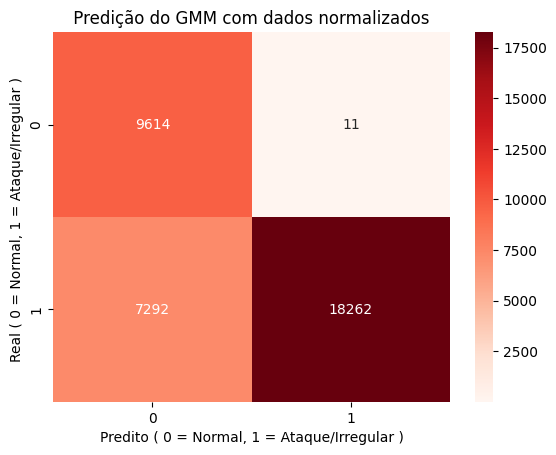

In [ ]:
# Exemplo genérico de avaliação (ajuste ao seu problema)
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

y_pred = GMM.predict(X_test_scaled)
print("Acurácia:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Exemplo de matriz de confusão
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds')
plt.title(" Predição do GMM com dados normalizados ")
plt.xlabel("Predito ( 0 = Normal, 1 = Ataque/Irregular )")
plt.ylabel("Real ( 0 = Normal, 1 = Ataque/Irregular ) ")
plt.show()

#### Visualização em um espaço de duas dimensões ( Reduzido usando PCA ) dos dados e das Gaussianas modeladas. A célula abaixo foi com ajuda do Gemini!


--- Visualizando os Clusters do GMM em 2D usando PCA e Elipses Gaussianas ---


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


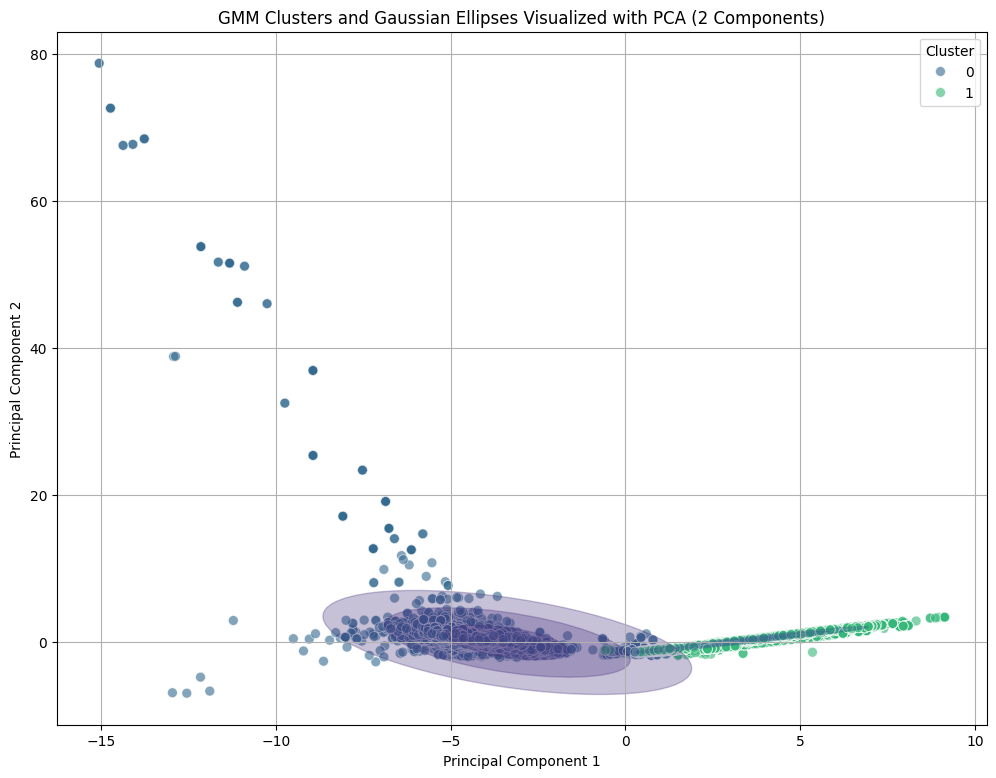


Isso visualiza os clusters do GMM projetados em um espaço 2D via PCA, com as elipses representando a forma das distribuições Gaussianas de cada cluster.


In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import linalg
import matplotlib as mpl

# --- Helper function to draw ellipses (adapted from scikit-learn example) ---
def draw_ellipse(position, covariance, ax=None, **kwargs):
    """Draw an ellipse with a given position and covariance"""
    ax = ax or plt.gca()

    # Convert covariance to a 2x2 matrix if it's not already
    if covariance.shape == (2, 2):
        U, s, Vt = linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        # If covariance is not 2x2, assume diagonal and take first two components for visualization
        # This might occur if original covariance was not full, but after PCA it should be 2x2.
        U, s, Vt = linalg.svd(np.diag(covariance.flatten()[:2])) # Flatten and take first two for example
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)

    # Plot three standard deviations of the ellipse
    for nstd in range(1, 4):
        ax.add_patch(mpl.patches.Ellipse(position, nstd * width, nstd * height,
                                         angle=angle, **kwargs)) # Pass angle as keyword argument

# --- Visualization of GMM Clusters using PCA ---
print("\n--- Visualizando os Clusters do GMM em 2D usando PCA e Elipses Gaussianas ---")

# Reduce dimensionality of the scaled test data to 2 components for visualization
pca = PCA(n_components=2)
X_test_pca = pca.fit_transform(X_test_scaled)

# Predict clusters for the original scaled test data
y_pred = GMM.predict(X_test_scaled)

# Create a DataFrame for plotting
pca_df = pd.DataFrame(data=X_test_pca, columns=['principal_component_1', 'principal_component_2'])
pca_df['cluster'] = y_pred

plt.figure(figsize=(12, 9))
ax = sns.scatterplot(
    x='principal_component_1', y='principal_component_2', hue='cluster', data=pca_df,
    palette='viridis', s=50, alpha=0.6, ax=plt.gca()
)

# Project GMM means and covariances into the PCA space
# PCA components_ has shape (n_components, n_features)
# GMM means_ has shape (n_components_gmm, n_features)
# GMM covariances_ has shape (n_components_gmm, n_features, n_features)

# Transform GMM means to PCA space
# The PCA model 'pca' was fitted on X_test_scaled (n_samples, n_features)
# GMM.means_ are in the original feature space (n_components, n_features)
# Applying pca.transform to GMM.means_ will project them correctly
means_pca = pca.transform(GMM.means_)

# Transform GMM covariances to PCA space
# A covariance matrix C in original space transforms to P @ C @ P.T in PCA space
# where P is the matrix of principal components (pca.components_)

covariances_pca = np.array([pca.components_ @ cov @ pca.components_.T for cov in GMM.covariances_])

# Plot the GMM ellipses
for i, (mean, cov) in enumerate(zip(means_pca, covariances_pca)):
    draw_ellipse(mean, cov, ax=ax, alpha=0.3, color=sns.color_palette('viridis')[i])


plt.title('GMM Clusters and Gaussian Ellipses Visualized with PCA (2 Components)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

print("\nIsso visualiza os clusters do GMM projetados em um espaço 2D via PCA, com as elipses representando a forma das distribuições Gaussianas de cada cluster.")

#### Comparando com os dados não normalizados.

Acurácia: 0.29219136416612185
              precision    recall  f1-score   support

           0       0.14      0.32      0.20      9625
           1       0.52      0.28      0.37     25554

    accuracy                           0.29     35179
   macro avg       0.33      0.30      0.28     35179
weighted avg       0.42      0.29      0.32     35179



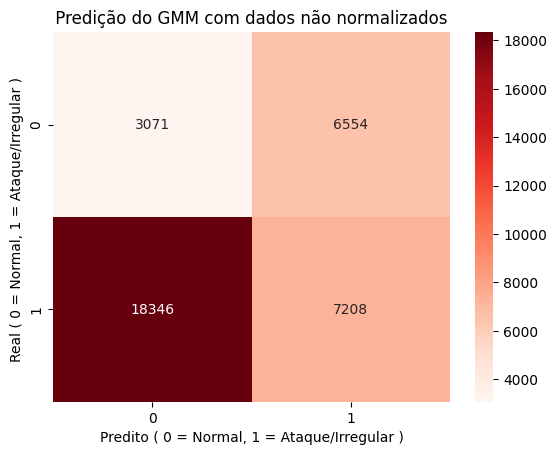

In [ ]:
GMM_comp = GaussianMixture(n_components=2, random_state=7)
GMM_comp.fit(X_train, y_train)

y_pred = GMM_comp.predict(X_test)
print("Acurácia:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Exemplo de matriz de confusão
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds')
plt.title(" Predição do GMM com dados não normalizados ")
plt.xlabel("Predito ( 0 = Normal, 1 = Ataque/Irregular )")
plt.ylabel("Real ( 0 = Normal, 1 = Ataque/Irregular ) ")
plt.show()

#### Comparando a eficiência do GMM com o K-Means.

Acurácia: 0.9315500724864265
              precision    recall  f1-score   support

           0       0.98      0.77      0.86      9625
           1       0.92      0.99      0.95     25554

    accuracy                           0.93     35179
   macro avg       0.95      0.88      0.91     35179
weighted avg       0.93      0.93      0.93     35179



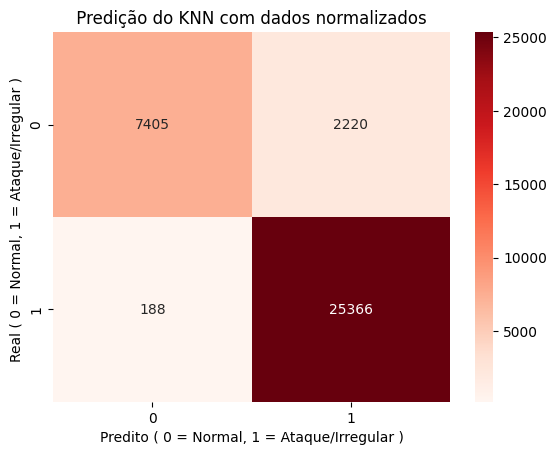

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

KNN = KNeighborsClassifier(n_neighbors=5)
KNN.fit(X_train_scaled, y_train)

y_pred = KNN.predict(X_test_scaled)
print("Acurácia:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Matriz de confusão para o KNN
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds')
plt.title(" Predição do KNN com dados normalizados ")
plt.xlabel("Predito ( 0 = Normal, 1 = Ataque/Irregular )")
plt.ylabel("Real ( 0 = Normal, 1 = Ataque/Irregular ) ")
plt.show()

## H. Discussão e limitações

Como dito anteriormente o GMM é um modelo que faz predições baseado em agrupamento. O modelo é treinado sem supervisionamento, de acordo com a documentação do scikit-learn a função fit recebe o argumento de **y** mas não usa-o:

`Not used, present for API consistency by convention.`
<br>

Os dados foram normalizados usando o StandardScaler que normaliza os dados para que tenham a média 0 e desvio padrão igual a 1. Consideramos que essa normalização contribuiria para a qualidade das predições do GMM o qual considera conjuntos de dados representados por Gaussianas.

<br>

O GMM pode ser usado em diversos cenários em que seja necessário fazer a classificação de dados ou agrupamento, considerando a característica probabilística, onde os dados podem pertencer a mais de um cluster, por exemplo. Alguns exemplos destas aplicações são explicados abaixo:

<br>

#### 1. Visão Computacional e Rastreamento em Tempo Real
Uma das aplicações mais intuitivas do GMM reside na visão computacional, especificamente na subtração de fundo e rastreamento de objetos. Em sistemas de drones (quadricópteros), o GMM é utilizado para distinguir o que é cenário estático (fundo) do que é um objeto em movimento. Devido à sua natureza multimodal, o modelo consegue lidar com fundos que não são perfeitamente estáticos (como árvores balançando ao vento), permitindo que o drone detecte e siga alvos dinamicamente com baixo custo computacional.

De forma análoga, em sistemas de assistência ao motorista, o GMM modela a distribuição de tons de pele e iluminação para realizar o rastreamento facial. A vantagem aqui é a robustez: mesmo que a luz dentro da cabine mude ou o motorista vire o rosto, o modelo probabilístico continua "entendendo" a região como sendo uma face, adaptando-se às variações sem perder o alvo, algo crucial para monitorar a fadiga e atenção ao volante.

<br>

#### 2. Identificação de Sinais e Hardware (Fingerprinting)
Saindo do espectro visível, o GMM demonstra grande eficácia no processamento de sinais de radiofrequência. Na classificação de antenas, o modelo atua na criação de "impressões digitais" eletrônicas. Como os sinais de radar retornados por antenas são extremamente ruidosos, métodos simples falham. O GMM, ao ajustar múltiplas curvas gaussianas aos dados de seção transversal de radar (RCS), consegue extrair uma assinatura estatística única para cada dispositivo. Isso permite identificar qual antena específica emitiu um sinal, transformando ruído em informação de identidade.

<br>

#### 3. Análise Volumétrica e Dados Científicos
No campo da visualização científica e médica, o GMM resolve o problema da opacidade dos dados. Ao explorar volumes 3D (como exames de ressonância ou simulações fluidodinâmicas), o desafio é separar estruturas de interesse (como um tumor ou um órgão) do restante dos tecidos. O GMM automatiza a criação de funções de transferência, agrupando voxels com base em suas propriedades estatísticas (densidade, gradiente). Isso permite segmentar e visualizar estruturas internas complexas que seriam invisíveis a olho nu ou difíceis de separar manualmente.

<br>

#### 4. Monitoramento Ambiental e de Processos
Por fim, a capacidade do GMM de definir o que é "normal" através de distribuições de probabilidade o torna ideal para monitoramento. Seja na análise de qualidade de imagens de satélite (separando nuvens de terra/mar) ou no monitoramento de processos industriais, o modelo aprende a distribuição estatística do funcionamento padrão. Qualquer dado que tenha baixa probabilidade de pertencer a essa mistura gaussiana é automaticamente sinalizado como uma anomalia ou ruído, garantindo a integridade da análise.

<br>

### Possibilidades de melhorias

Para melhorar a qualidade e abrangência do nosso modelo seria necessário testar diferentes métodos de inicialização do GMM, diferentes técnicas de normalização dos dados e redução da dimensionalidade já que o dataset tem muitas colunas.

## I. Conclusões

O GMM é um modelo de aprendizado não-supervisionado usado para agrupamento. A partir do agrupamento é possível fazer classificação dos dados e entender e visualizar os diferentes conjuntos que um dataset pode possuir. O modelo consegue modelar dados com variáveis com baixa relação entre si como discutido no artigo que usou o GMM para modelar ruídos de antenas e os modelos de antenas.

<br>

O nosso modelo obteve acurácia mediana, necessitando de diversificação dos testes para tentar melhoras as predições, houve uma melhor avaliação de casos de tráfego incomum/ataque indicando a possibilidade de usar um modelo melhorado para avaliação de rede.

## J. Referências

### Referência dos exemplos da seção 'Discussão e Limitações'


- "Implementation and Comparison of Speech Emotion Recognition System Using Gaussian Mixture Model (GMM) and K- Nearest Neighbor (K-NN) Techniques" no site da ScienceDirect, acessível em: https://www.sciencedirect.com/science/article/pii/S1877050915007358

- "Antenna Classification Using Gaussian Mixture Models (GMM) and Machine Learning" no site da IEEE Xplore, acessível em: https://ieeexplore.ieee.org/abstract/document/9137168

- "Efficient Volume Exploration Using the Gaussian Mixture Model" no site da IEEE Xplore, acessível em: https://ieeexplore.ieee.org/abstract/document/5887324

- "Driver face tracking using Gaussian mixture model" no site da IEEE Xplore, acessível em: https://ieeexplore.ieee.org/abstract/document/1212978

- "Gaussian Mixture Model (GMM) Based Dynamic Object Detection and Tracking" no site da IEEE Xplore, acessível em: https://ieeexplore.ieee.org/abstract/document/8797927

<br>

### Demais referências

- "The UNSW-NB15 Dataset" no site da Universidade de New South Wales, acessível em: https://research.unsw.edu.au/projects/unsw-nb15-dataset

- "Gaussian Mixture Model" no site GeekforGeeks, acessível em: https://www.geeksforgeeks.org/machine-learning/gaussian-mixture-model/

- "What is a Gaussian mixture model" no site da IBM, acessível em: https://www.ibm.com/think/topics/gaussian-mixture-model

- "Expectation-maximization algorithm" no site da Wikipedia, acessível em: https://en.wikipedia.org/wiki/Expectation%E2%80%93maximization_algorithm

- "Meaning of gaussian mixture weights" na comunidade de Estatística do Stackexchange, acessível em: https://stats.stackexchange.com/a/476352


- Link para baixar o dataset ( Estava disponível antes mas agora é ncessário login para acessar. ): https://unsw-my.sharepoint.com/personal/z5025758_ad_unsw_edu_au/_layouts/15/onedrive.aspx?id=%2Fpersonal%2Fz5025758%5Fad%5Funsw%5Fedu%5Fau%2FDocuments%2FUNSW%2DNB15%20dataset&viewid=f8d1dec5%2Dcd5f%2D42ae%2D8b06%2D2fece580c74a&ga=1
